In [103]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


In [104]:
df = pd.read_csv(r"D:\csv\Student_Performance.csv",encoding='unicode_escape')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [121]:
df.shape

(10000, 6)

In [105]:
dfreplace = df.replace({'Extracurricular Activities':{'Yes': 1, 'No': 0}}, inplace=True)

C:\Users\hb292\AppData\Local\Temp\ipykernel_13880\3890842633.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfreplace = df.replace({'Extracurricular Activities':{'Yes': 1, 'No': 0}}, inplace=True)


In [106]:
dfreplace  

In [107]:
X = df[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced', 'Extracurricular Activities']]
y = df['Performance Index']

In [108]:
X

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities
0,7,99,9,1,1
1,4,82,4,2,0
2,8,51,7,2,1
3,5,52,5,2,1
4,7,75,8,5,0
...,...,...,...,...,...
9995,1,49,4,2,1
9996,7,64,8,5,1
9997,6,83,8,5,1
9998,9,97,7,0,1


In [109]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [111]:
X_train

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities
9069,4,99,6,1,1
2603,6,90,9,3,1
7738,8,57,6,1,0
1579,6,92,8,7,1
5058,6,64,8,4,1
...,...,...,...,...,...
5734,8,50,6,6,1
5191,4,68,9,3,0
5390,9,48,7,6,0
860,1,47,9,0,0


In [112]:
Y_train

9069    82.0
2603    79.0
7738    50.0
1579    81.0
5058    52.0
        ... 
5734    48.0
5191    51.0
5390    44.0
860     20.0
7270    24.0
Name: Performance Index, Length: 7000, dtype: float64

In [113]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [114]:
y_pred = lr.predict(X_test)

In [115]:
y_pred

array([54.74728554, 22.61884434, 47.93665124, ..., 33.42451751,
       67.92578967, 31.20587077], shape=(3000,))

In [116]:
Y_test

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
        ... 
8014    32.0
1074    40.0
3063    33.0
6487    69.0
4705    29.0
Name: Performance Index, Length: 3000, dtype: float64

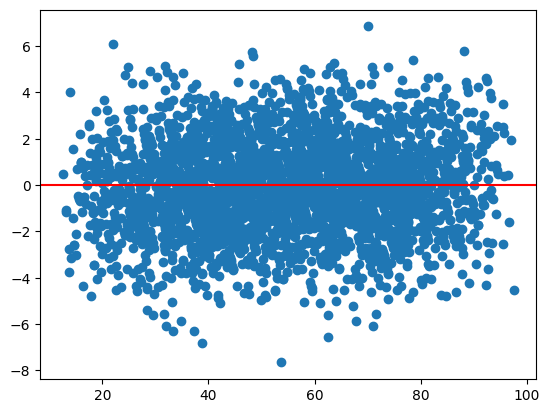

In [117]:
import matplotlib.pyplot as plt

residuals = Y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red')

In [118]:
from sklearn.metrics import r2_score
accuracy = r2_score(Y_test, y_pred)
print("Accuracy (R²):", accuracy)

Accuracy (R²): 0.9890110607021136
